## WEEK 1. Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [20]:
import pandas as pd
import numpy as np
import collections
import scipy
from scipy import stats
import seaborn as sns
import random
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
X = pd.read_csv('orange_small_churn_data.txt', header=0, sep=',')
y = pd.read_csv('orange_small_churn_labels.txt', header=None, names=['Class'], sep=',')

#Создаем общую таблицу
data = pd.DataFrame(np.hstack((X,y)), columns = list(X.columns) + list(y.columns))
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Class
0,NaN,NaN,NaN,NaN,NaN,3052,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813,7,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953,7,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533,7,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686,7,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


#### Обработаем пропуски:

In [3]:
X_zeros = X.iloc[:, 0:190].dropna(axis = 1, thresh=1)  #удаляем пустые столбцы у числовых признаков (останется 174 признака)
X_zeros = X_zeros.fillna(0)                            #заполняем пропуски нулями

In [4]:
X_cat = X.iloc[:, 190:].dropna(axis = 1, thresh=1)     #удаляем пустые столбцы у категориальных признаков (останется 38 приз-ов)
X_cat=X_cat.fillna('NA', axis=0).applymap(str)         #приводим все значения к строковым и заполняем пропуски строкой "NA"

#### Отмасштабируем вещественные признаки:

In [5]:
from sklearn.preprocessing import StandardScaler #StandardScaler отнимает среднее и делит на выборочное стандарт.отклонение

scaler = StandardScaler()
scaler.fit_transform(X_zeros)
X_num = scaler.transform(X_zeros)
X_num = pd.DataFrame(X_num, columns=X_zeros.columns)
X_num.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
0,-0.035897,-0.005,-0.015162,-0.018862,-0.059109,0.752687,-0.958402,-0.036719,-0.064589,-0.153795,...,-0.085441,-0.231696,-0.094253,-0.056017,-0.033246,-0.041839,-0.033518,-0.131877,-0.783775,-0.048366
1,-0.035897,-0.005,-0.015162,-0.018862,-0.059109,0.256220,0.152660,-0.036719,-0.064589,-0.153795,...,-0.085441,-0.231696,-0.094253,-0.056017,-0.033246,-0.041839,-0.033518,-0.131877,1.121398,-0.048366
2,-0.035897,-0.005,-0.015162,-0.018862,-0.059109,0.312318,0.152660,-0.036719,-0.064589,-0.153795,...,-0.085441,-0.231696,-0.094253,-0.056017,-0.033246,-0.041839,-0.033518,-0.131877,-0.783775,-0.048366
3,-0.035897,-0.005,-0.015162,-0.018862,-0.059109,0.144024,0.152660,-0.036719,-0.064589,-0.153795,...,-0.085441,-0.231696,-0.094253,-0.056017,-0.033246,-0.041839,-0.033518,-0.131877,-0.783775,-0.048366
4,-0.035897,-0.005,-0.015162,-0.018862,-0.059109,-0.195369,0.152660,-0.036719,-0.064589,-0.153795,...,-0.085441,-0.231696,-0.094253,-0.056017,-0.033246,-0.041839,-0.033518,-0.131877,-0.783775,-0.048366


In [6]:
#итоговые данные без пропусков и отмасштабированные

data = pd.DataFrame(np.hstack((X_num, X_cat, y)), columns = list(X_num.columns) + list(X_cat.columns) + list(y.columns))
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Class
0,-0.0358974,-0.00500006,-0.0151623,-0.0188619,-0.0591086,0.752687,-0.958402,-0.0367186,-0.0645889,-0.153795,...,Al6ZaUT,vr93T2a,LM8l689qOp,NA,NA,fKCe,02N6s8f,xwM2aC7IdeMC0,NA,-1
1,-0.0358974,-0.00500006,-0.0151623,-0.0188619,-0.0591086,0.25622,0.15266,-0.0367186,-0.0645889,-0.153795,...,oslk,6hQ9lNX,LM8l689qOp,NA,ELof,xb3V,RAYp,55YFVY9,mj86,-1
2,-0.0358974,-0.00500006,-0.0151623,-0.0188619,-0.0591086,0.312318,0.15266,-0.0367186,-0.0645889,-0.153795,...,zCkv,catzS2D,LM8l689qOp,NA,NA,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,-1
3,-0.0358974,-0.00500006,-0.0151623,-0.0188619,-0.0591086,0.144024,0.15266,-0.0367186,-0.0645889,-0.153795,...,oslk,e4lqvY0,LM8l689qOp,NA,NA,xb3V,RAYp,F2FyR07IdsN7I,NA,1
4,-0.0358974,-0.00500006,-0.0151623,-0.0188619,-0.0591086,-0.195369,0.15266,-0.0367186,-0.0645889,-0.153795,...,oslk,MAz3HNj,LM8l689qOp,NA,NA,WqMG,RAYp,F2FyR07IdsN7I,NA,-1


2. Рассчитайте доли классов `отток` и `не отток`.

In [7]:
print("Доля оттока: %s" %(collections.Counter(y.Class)[1]/data.shape[0]))
print("Доля не оттока: %s" %(collections.Counter(y.Class)[-1]/data.shape[0]))

Доля оттока: 0.0744
Доля не оттока: 0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, однако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [9]:
# Считаем корреляцию между непрерывными признаками и бинарной целевой переменной как разницу мат.ожиданий
# Мат.ожидания оцениваем как выборочные средние для разных классов

corr_num=[]
j=0
while j < X_num.shape[1]:
    corr = abs(data[data.Class == 1].iloc[:,j].mean() - data[data.Class == -1].iloc[:,j].mean())
    corr_num.append(corr)
    j+=1

In [10]:
сorr_num = pd.DataFrame({"Переменная": X_num.columns, "Корреляция": corr_num})
сorr_num.head()

,Переменная,Корреляция
0,Var1,0.002214
1,Var2,0.005402
2,Var3,0.010766
3,Var4,0.007335
4,Var5,0.033159


In [11]:
def cramer(matrix):     #Для расчета корреляции между категор.признаками и бинарной цел.пер. используем коэффициент Крамера
    if min(matrix.shape) >=2:
        ch2 = stats.chi2_contingency(matrix)[0]
        n=sum(sum(np.array(matrix)))
        cramer=np.sqrt(ch2/(n*(min(matrix.shape)-1)))
    else: cramer='Nan'
    return cramer

In [12]:
corr_cat=[]
    
for j in range(X_cat.shape[1]):    
    tab_cross = pd.crosstab(X_cat.iloc[:, j], data.Class)
    corr_cat.append(cramer(tab_cross))

In [13]:
#посчитаем долю пропусков в категориальных признаках и добавим инф-ию к предыдущей таблице:
Nan = []
for j in range(X_cat.shape[1]):
    Nan.append(collections.Counter(X_cat.iloc[:,j]=='NA')[True]/X_cat.shape[0])

In [14]:
сorr_cat_tab = pd.DataFrame({"Переменная": X_cat.columns, "Корреляция": corr_cat, "Доля пропусков": Nan})
сorr_cat_tab.head()

,Переменная,Корреляция,Доля пропусков
0,Var191,0.013905,0.978225
1,Var192,0.151247,0.007275
2,Var193,0.070207,0.000000
3,Var194,0.019348,0.745250
4,Var195,0.031671,0.000000


In [15]:
# Отсортируем сначала по убыванию корреляции, а затем по возрастанию доли пропусков.  
сorr_cat_tab.sort_values(['Корреляция','Доля пропусков'], ascending=[False,True]).head()

,Переменная,Корреляция,Доля пропусков
25,Var217,0.529863,0.014000
9,Var200,0.525991,0.509150
22,Var214,0.525991,0.509150
8,Var199,0.407831,0.000100
11,Var202,0.363433,0.000025


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [16]:
top20 = сorr_num.sort_values(by = ['Корреляция'], ascending = False)[0:20]
top20.head()

,Переменная,Корреляция
62,Var73,0.265033
101,Var113,0.213831
6,Var7,0.210185
114,Var126,0.164975
69,Var81,0.164740


In [21]:
var = list(top20.Переменная)

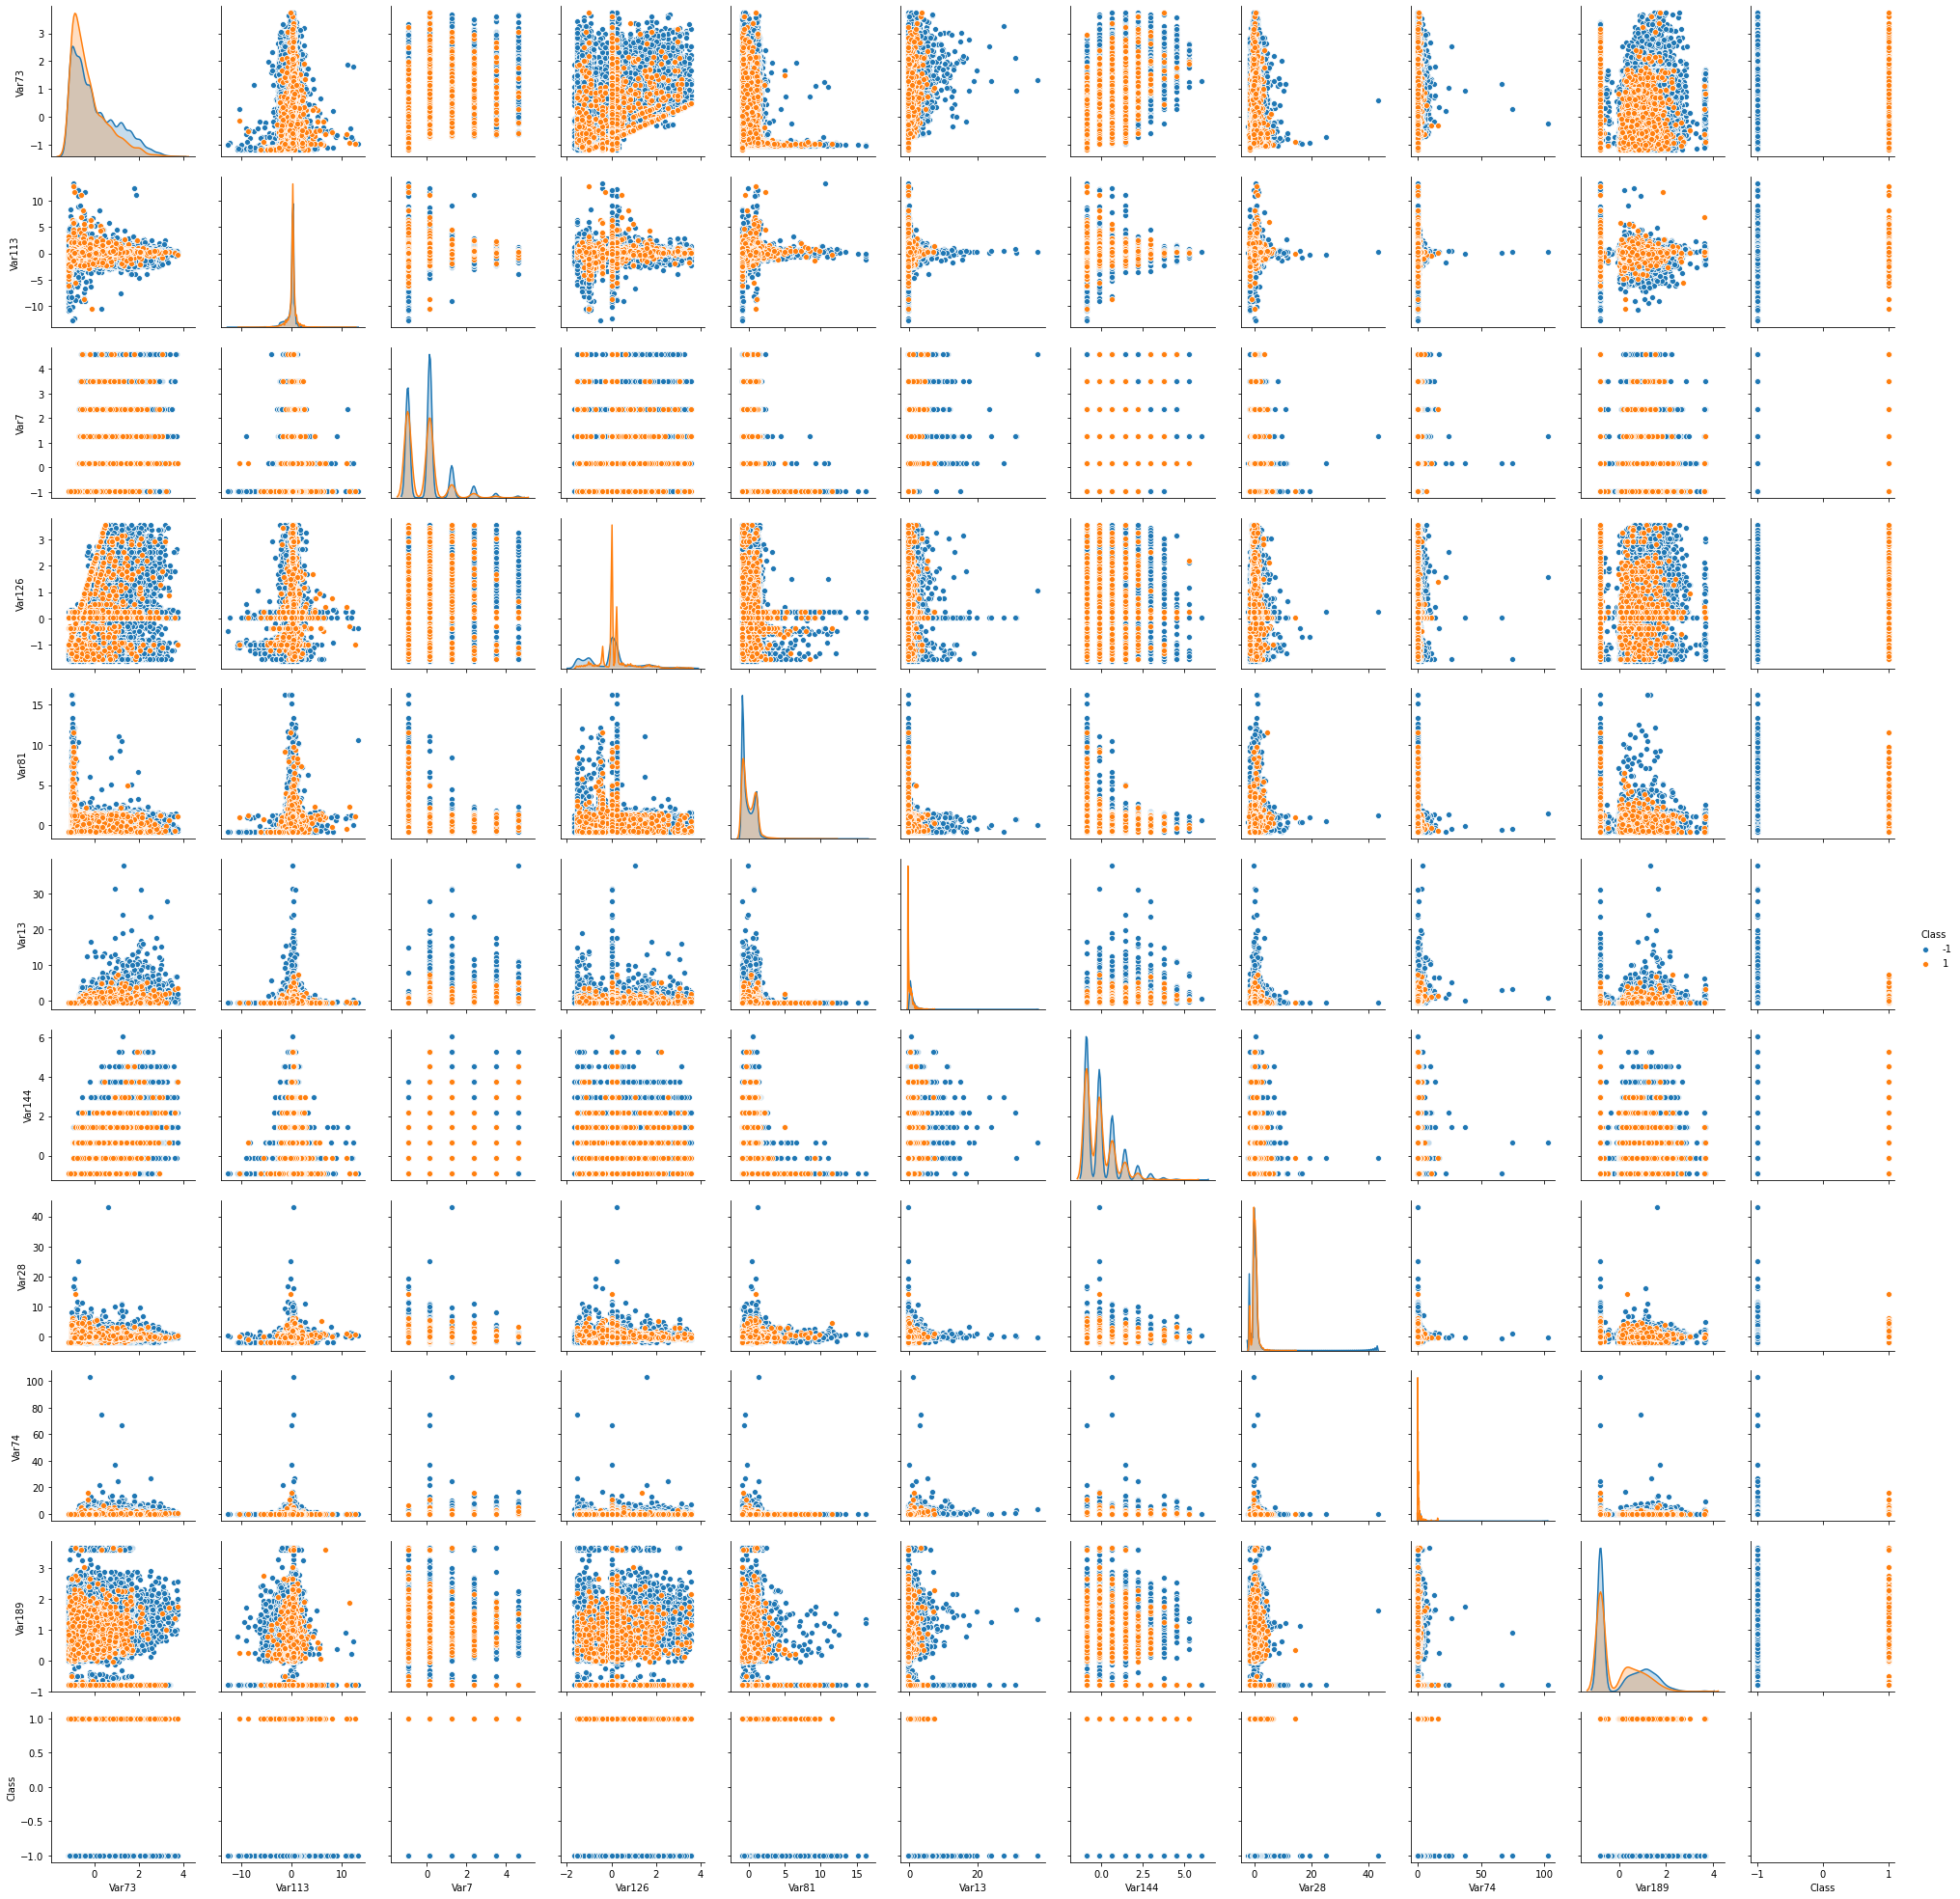

In [22]:
#Распределения в разрезе классов отображены по диагонали
#Построим графики для первых десяти признаков из top-20 (разделили на две части для наглядности)
sns.pairplot(data.iloc[:][var[:10]+['Class']], hue='Class', diag_kind="kde")  

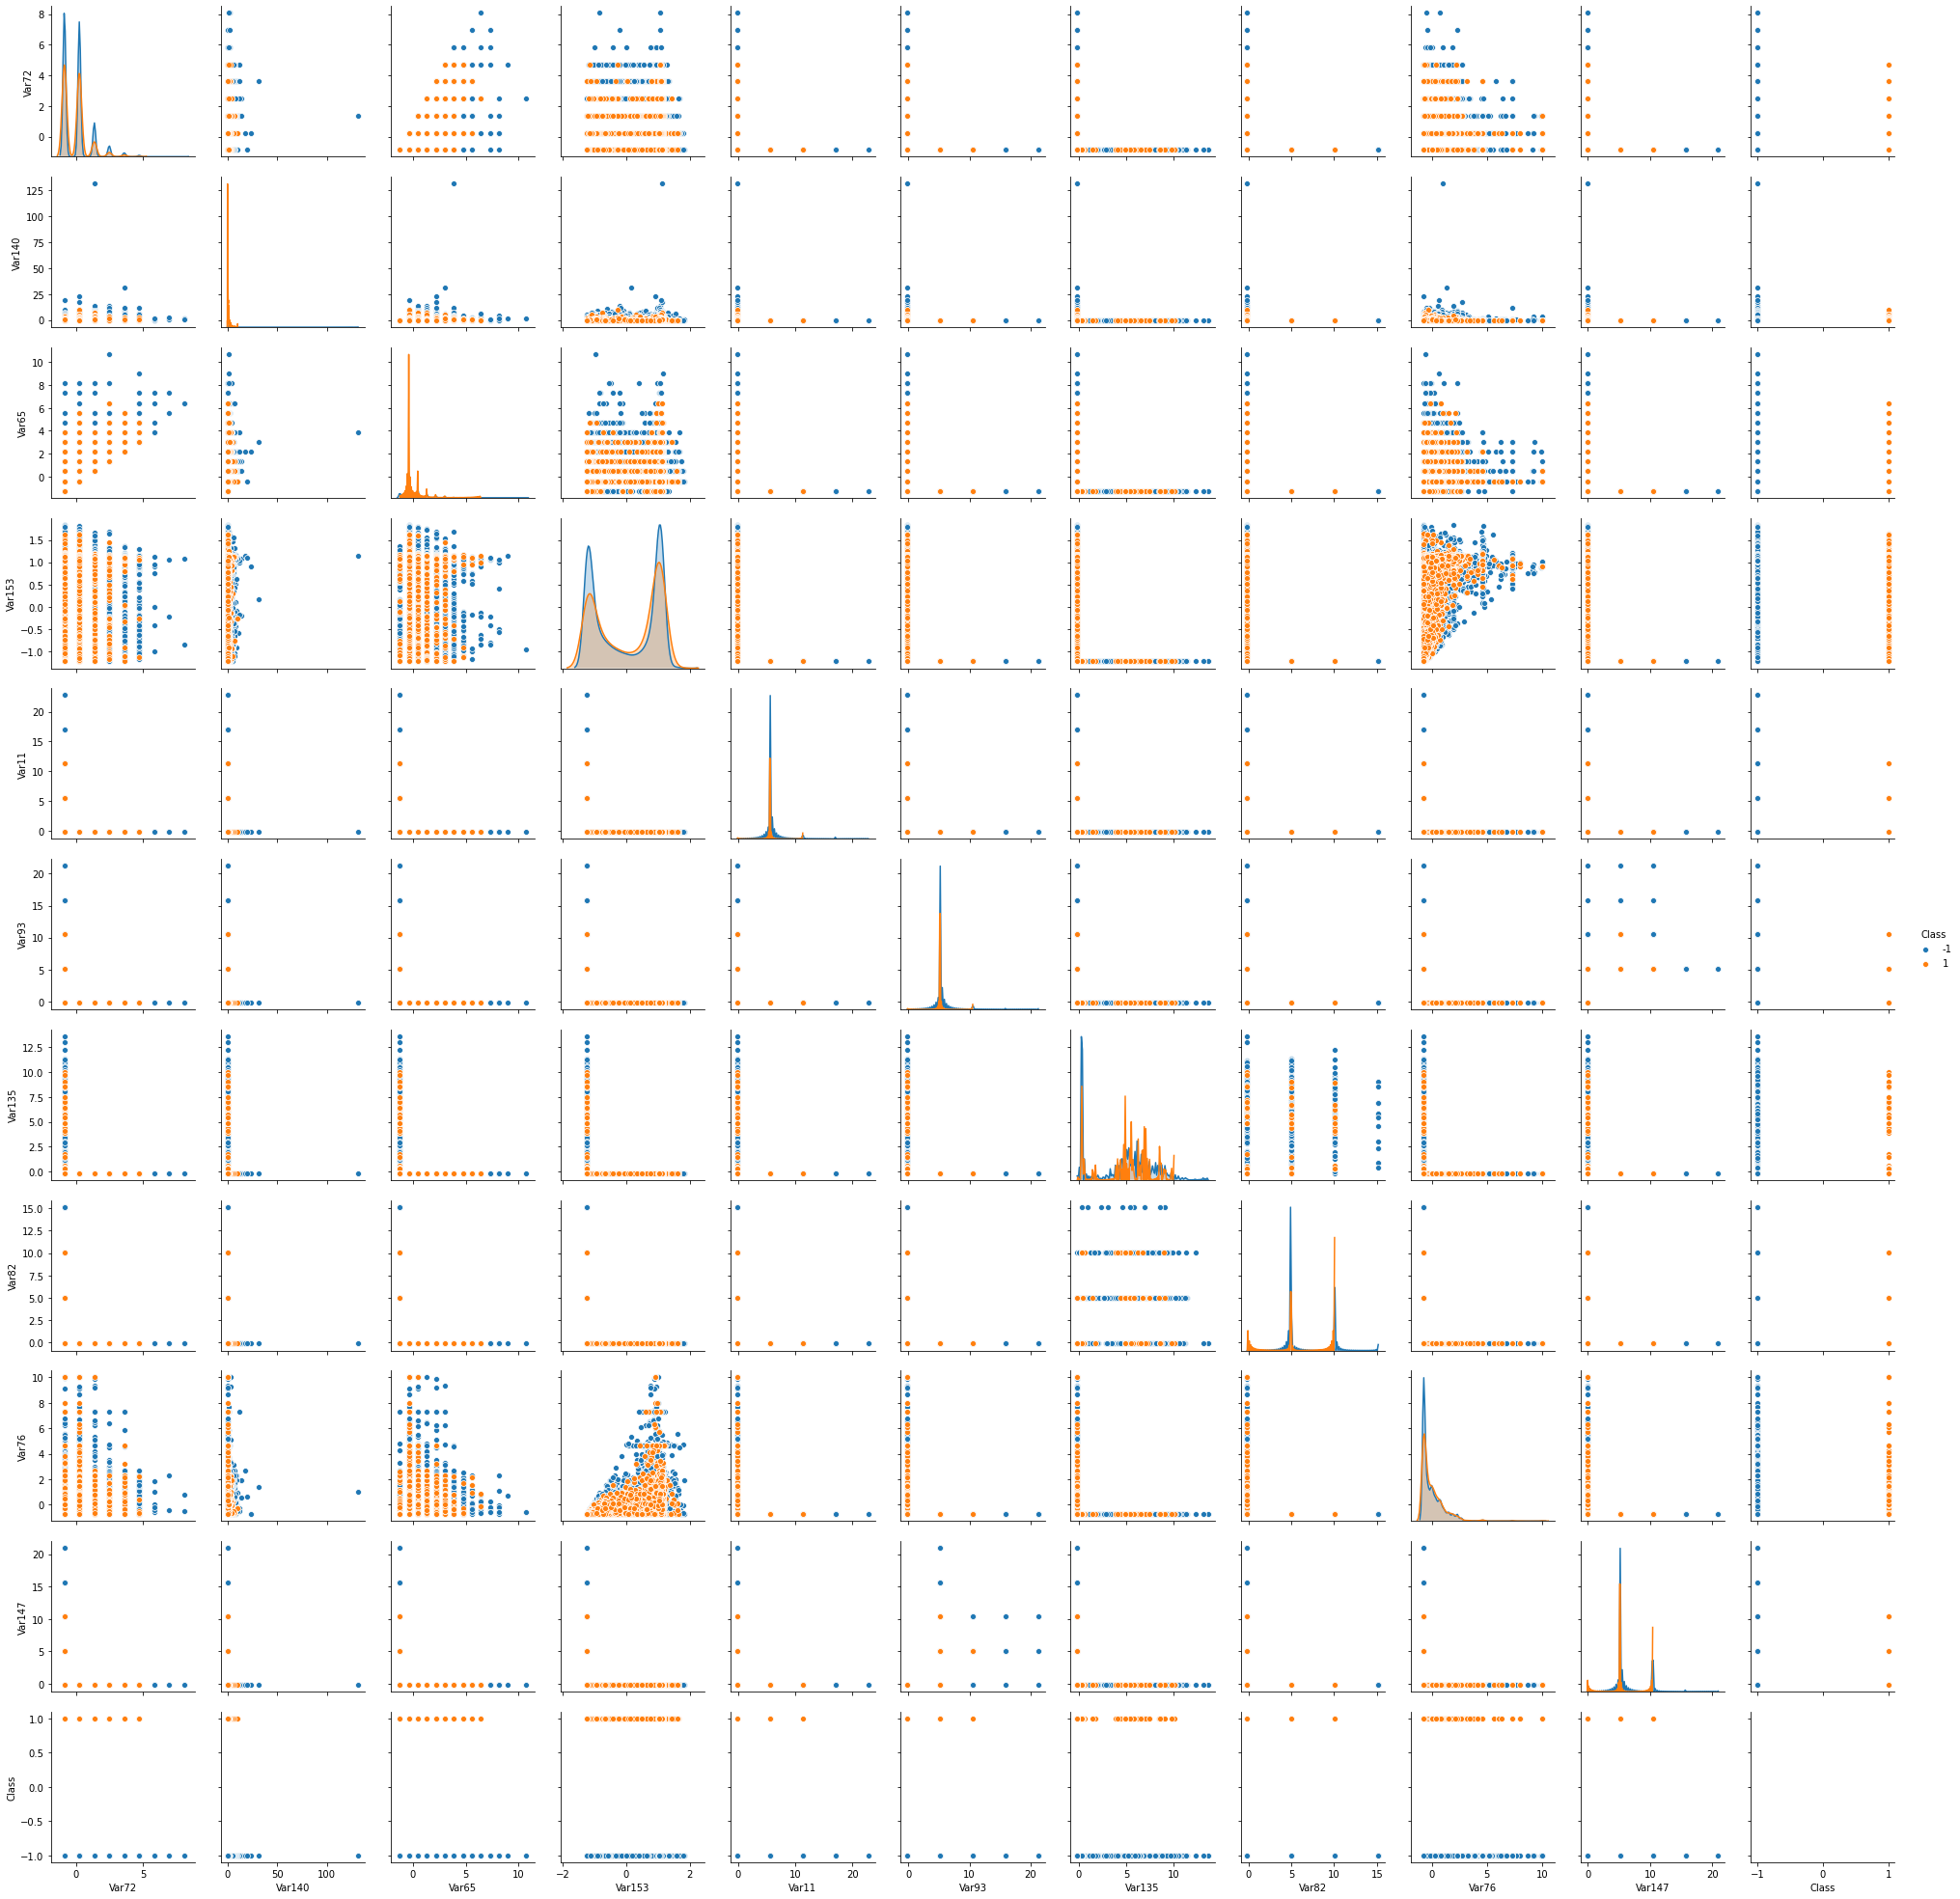

In [23]:
#Строим графики для вторых десяти признаков из top-20:
sns.pairplot(data.iloc[:][var[10:]+['Class']], hue='Class', diag_kind="kde")

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [260]:
random.seed(2)

random10 = [random.randint(0, X_num.shape[1]) for i in range(10)]
random10

[14, 23, 21, 92, 43, 171, 78, 64, 155, 54]

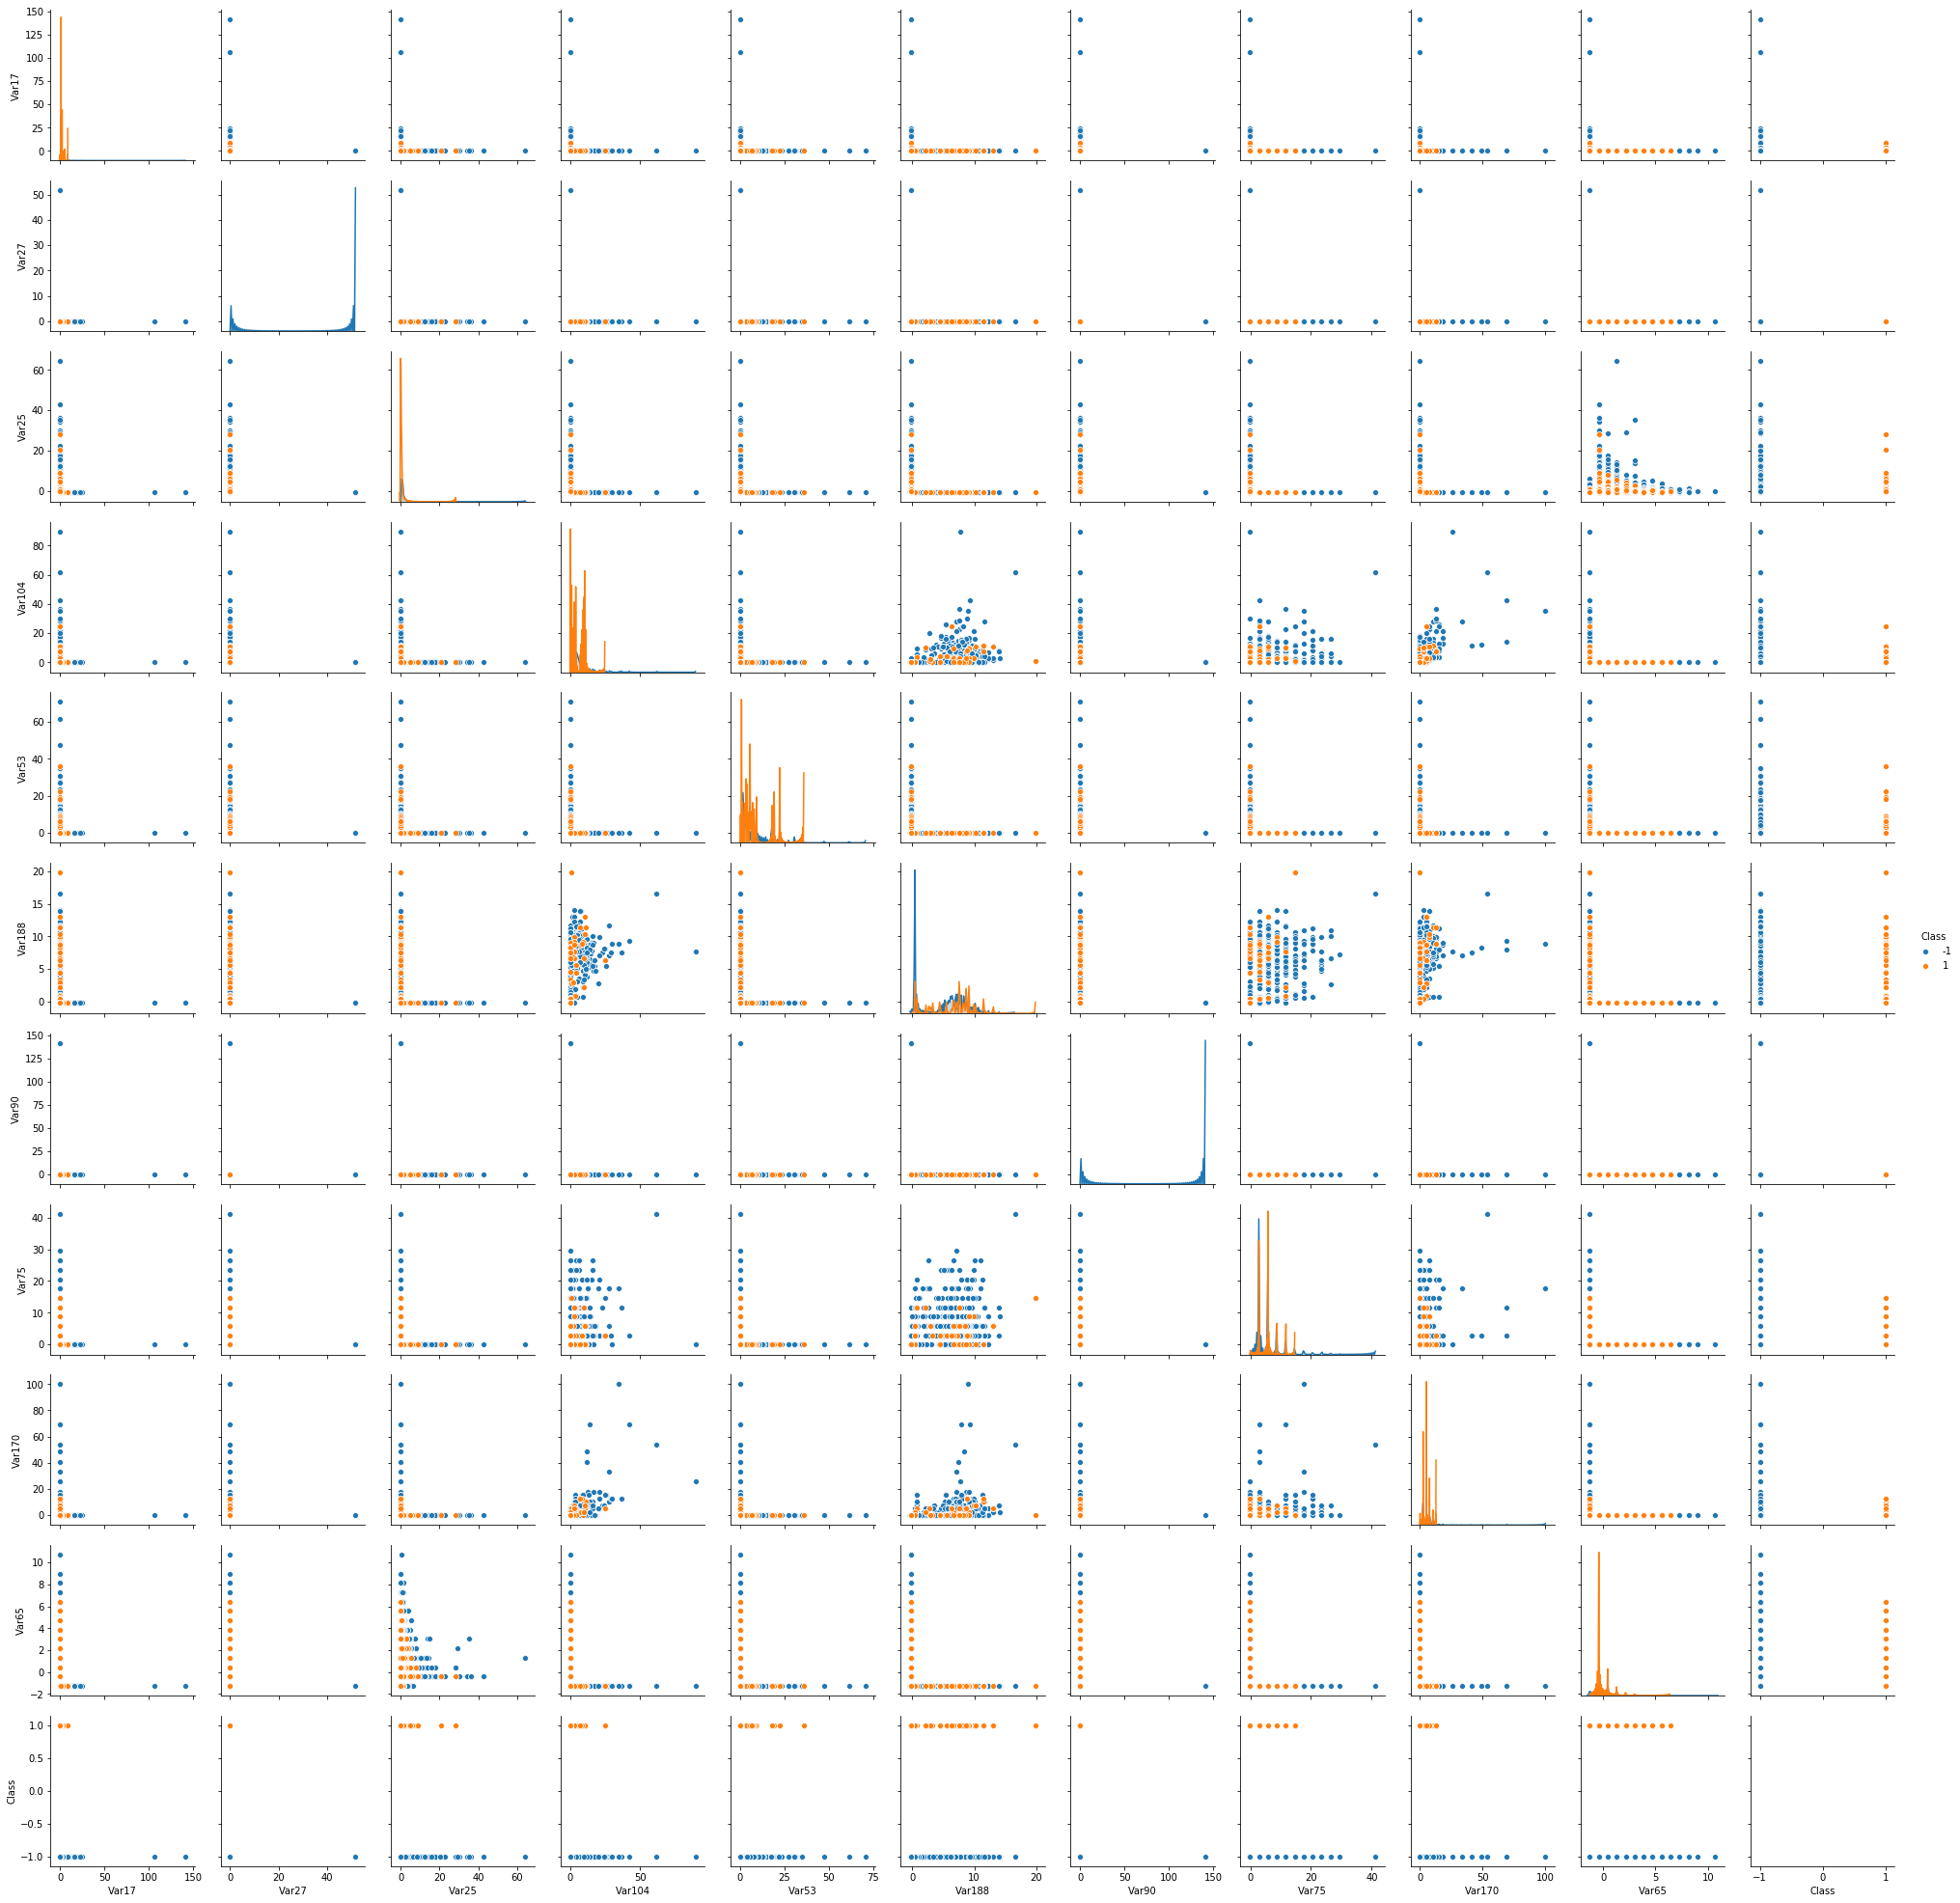

In [261]:
sns.pairplot(data.iloc[:, random10+[data.shape[1]-1]], hue='Class', diag_kind="kde")

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [24]:
min10 = сorr_num.sort_values(by = ['Корреляция'], ascending = True)[0:10]
min10.head()

,Переменная,Корреляция
52,Var63,0.000148
99,Var111,0.000360
104,Var116,0.000807
127,Var139,0.001431
170,Var187,0.001644


In [25]:
var = list(min10.Переменная)

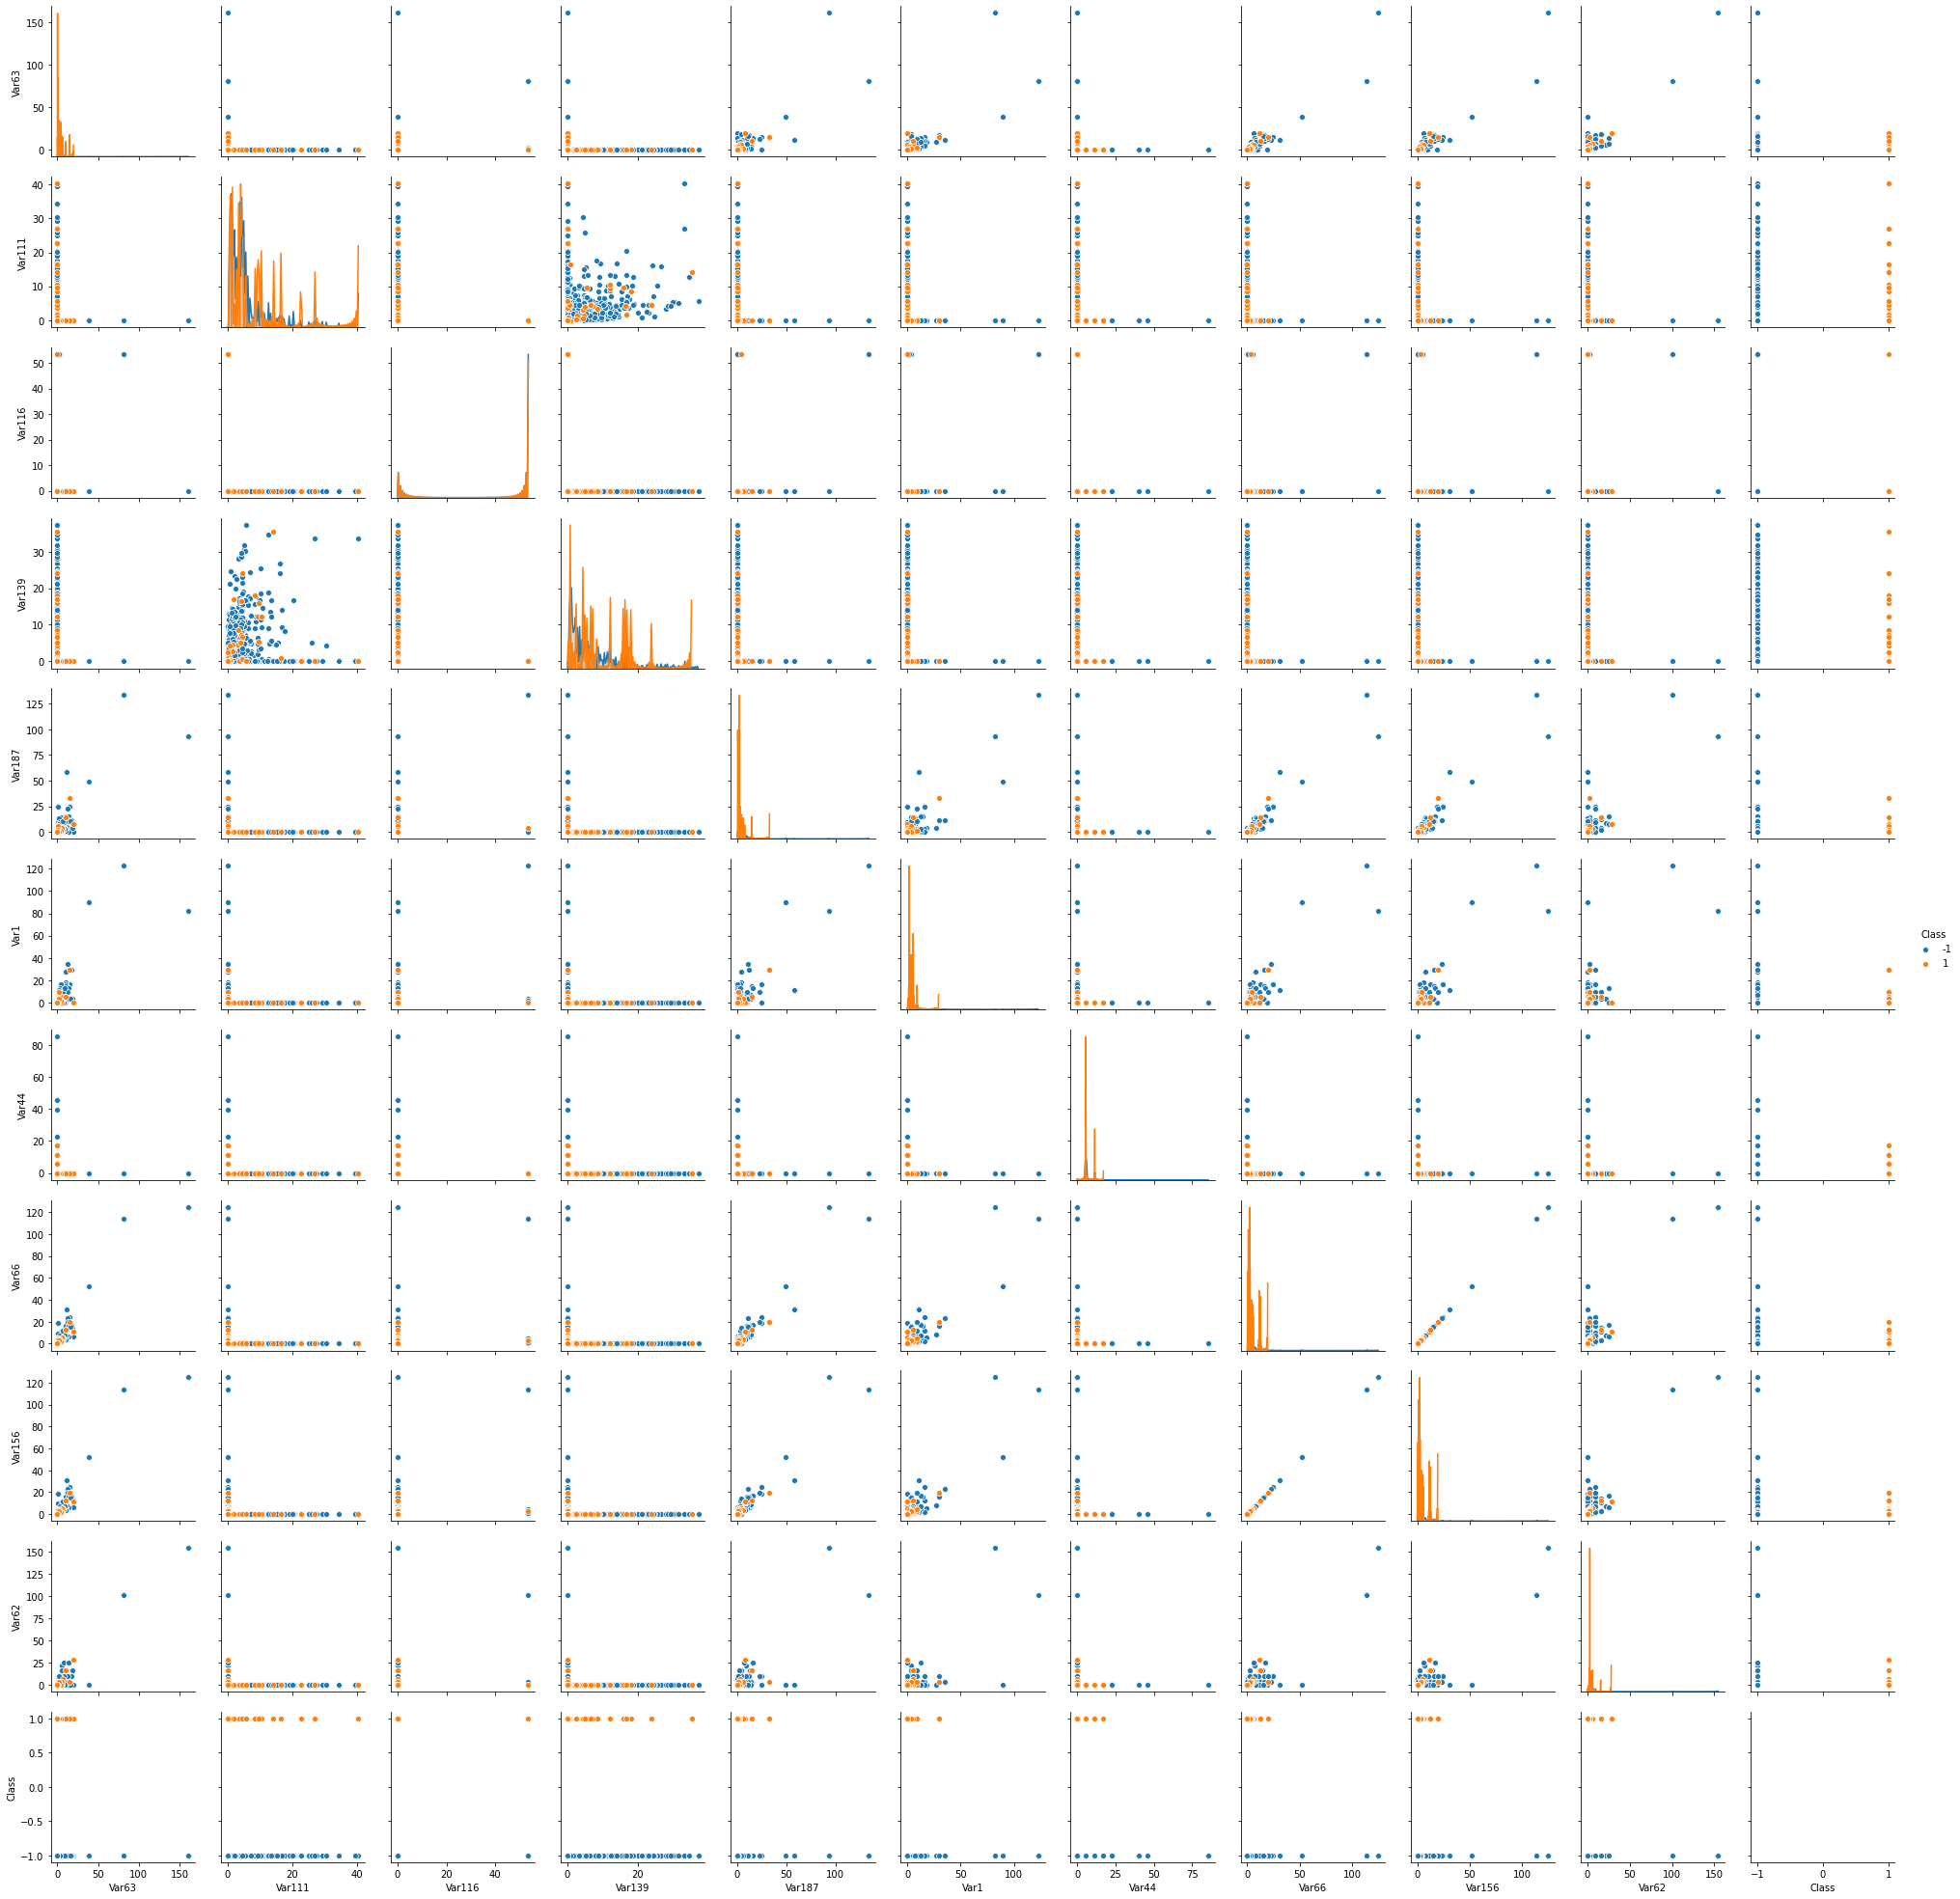

In [26]:
sns.pairplot(data.iloc[:][var+['Class']], hue='Class', diag_kind="kde")

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

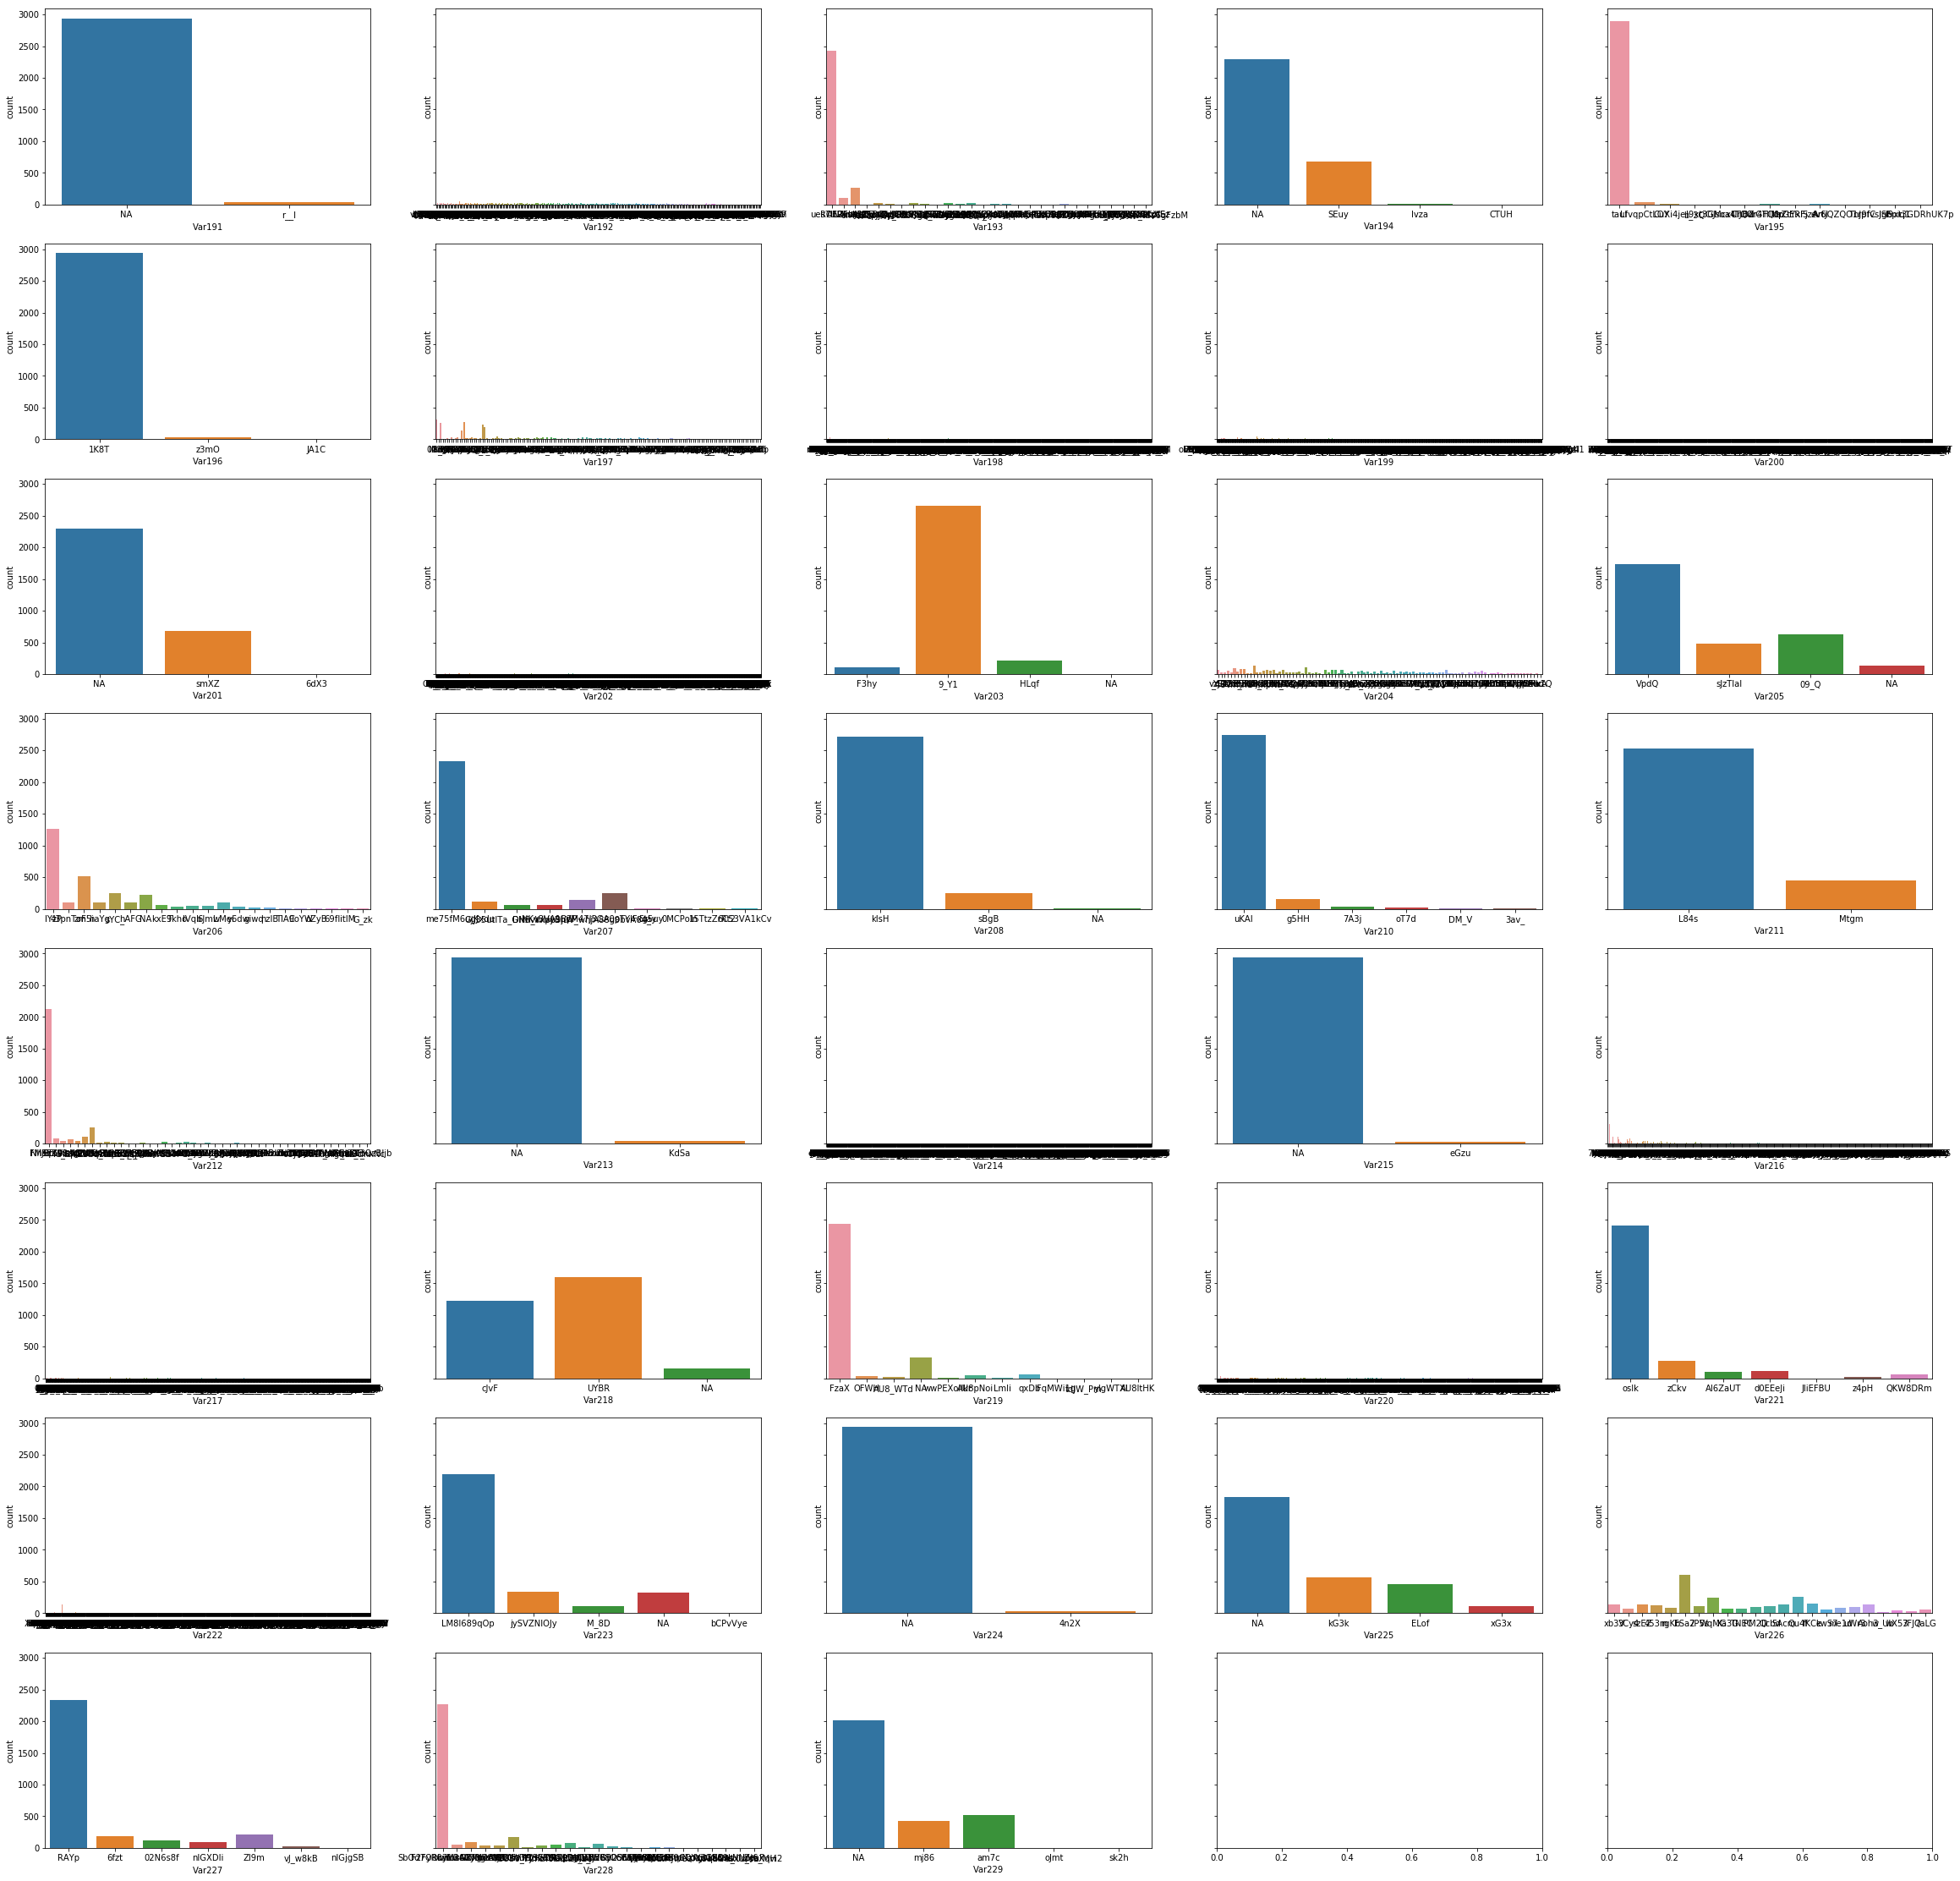

In [77]:
# На каждом графике гистограмма признака для в разрезе класса 1 
# (всего 38 катег.признака, два выкинули в самом начале из-за отсутствия значений)

fig, axes = plt.subplots(8, 5, figsize=(40, 40), sharey=True)
for i in range(X_cat.shape[1]):
    sns.countplot(x=X_cat.columns[i], data=data[data.Class==1], ax=axes[int(i / 5), i % 5])

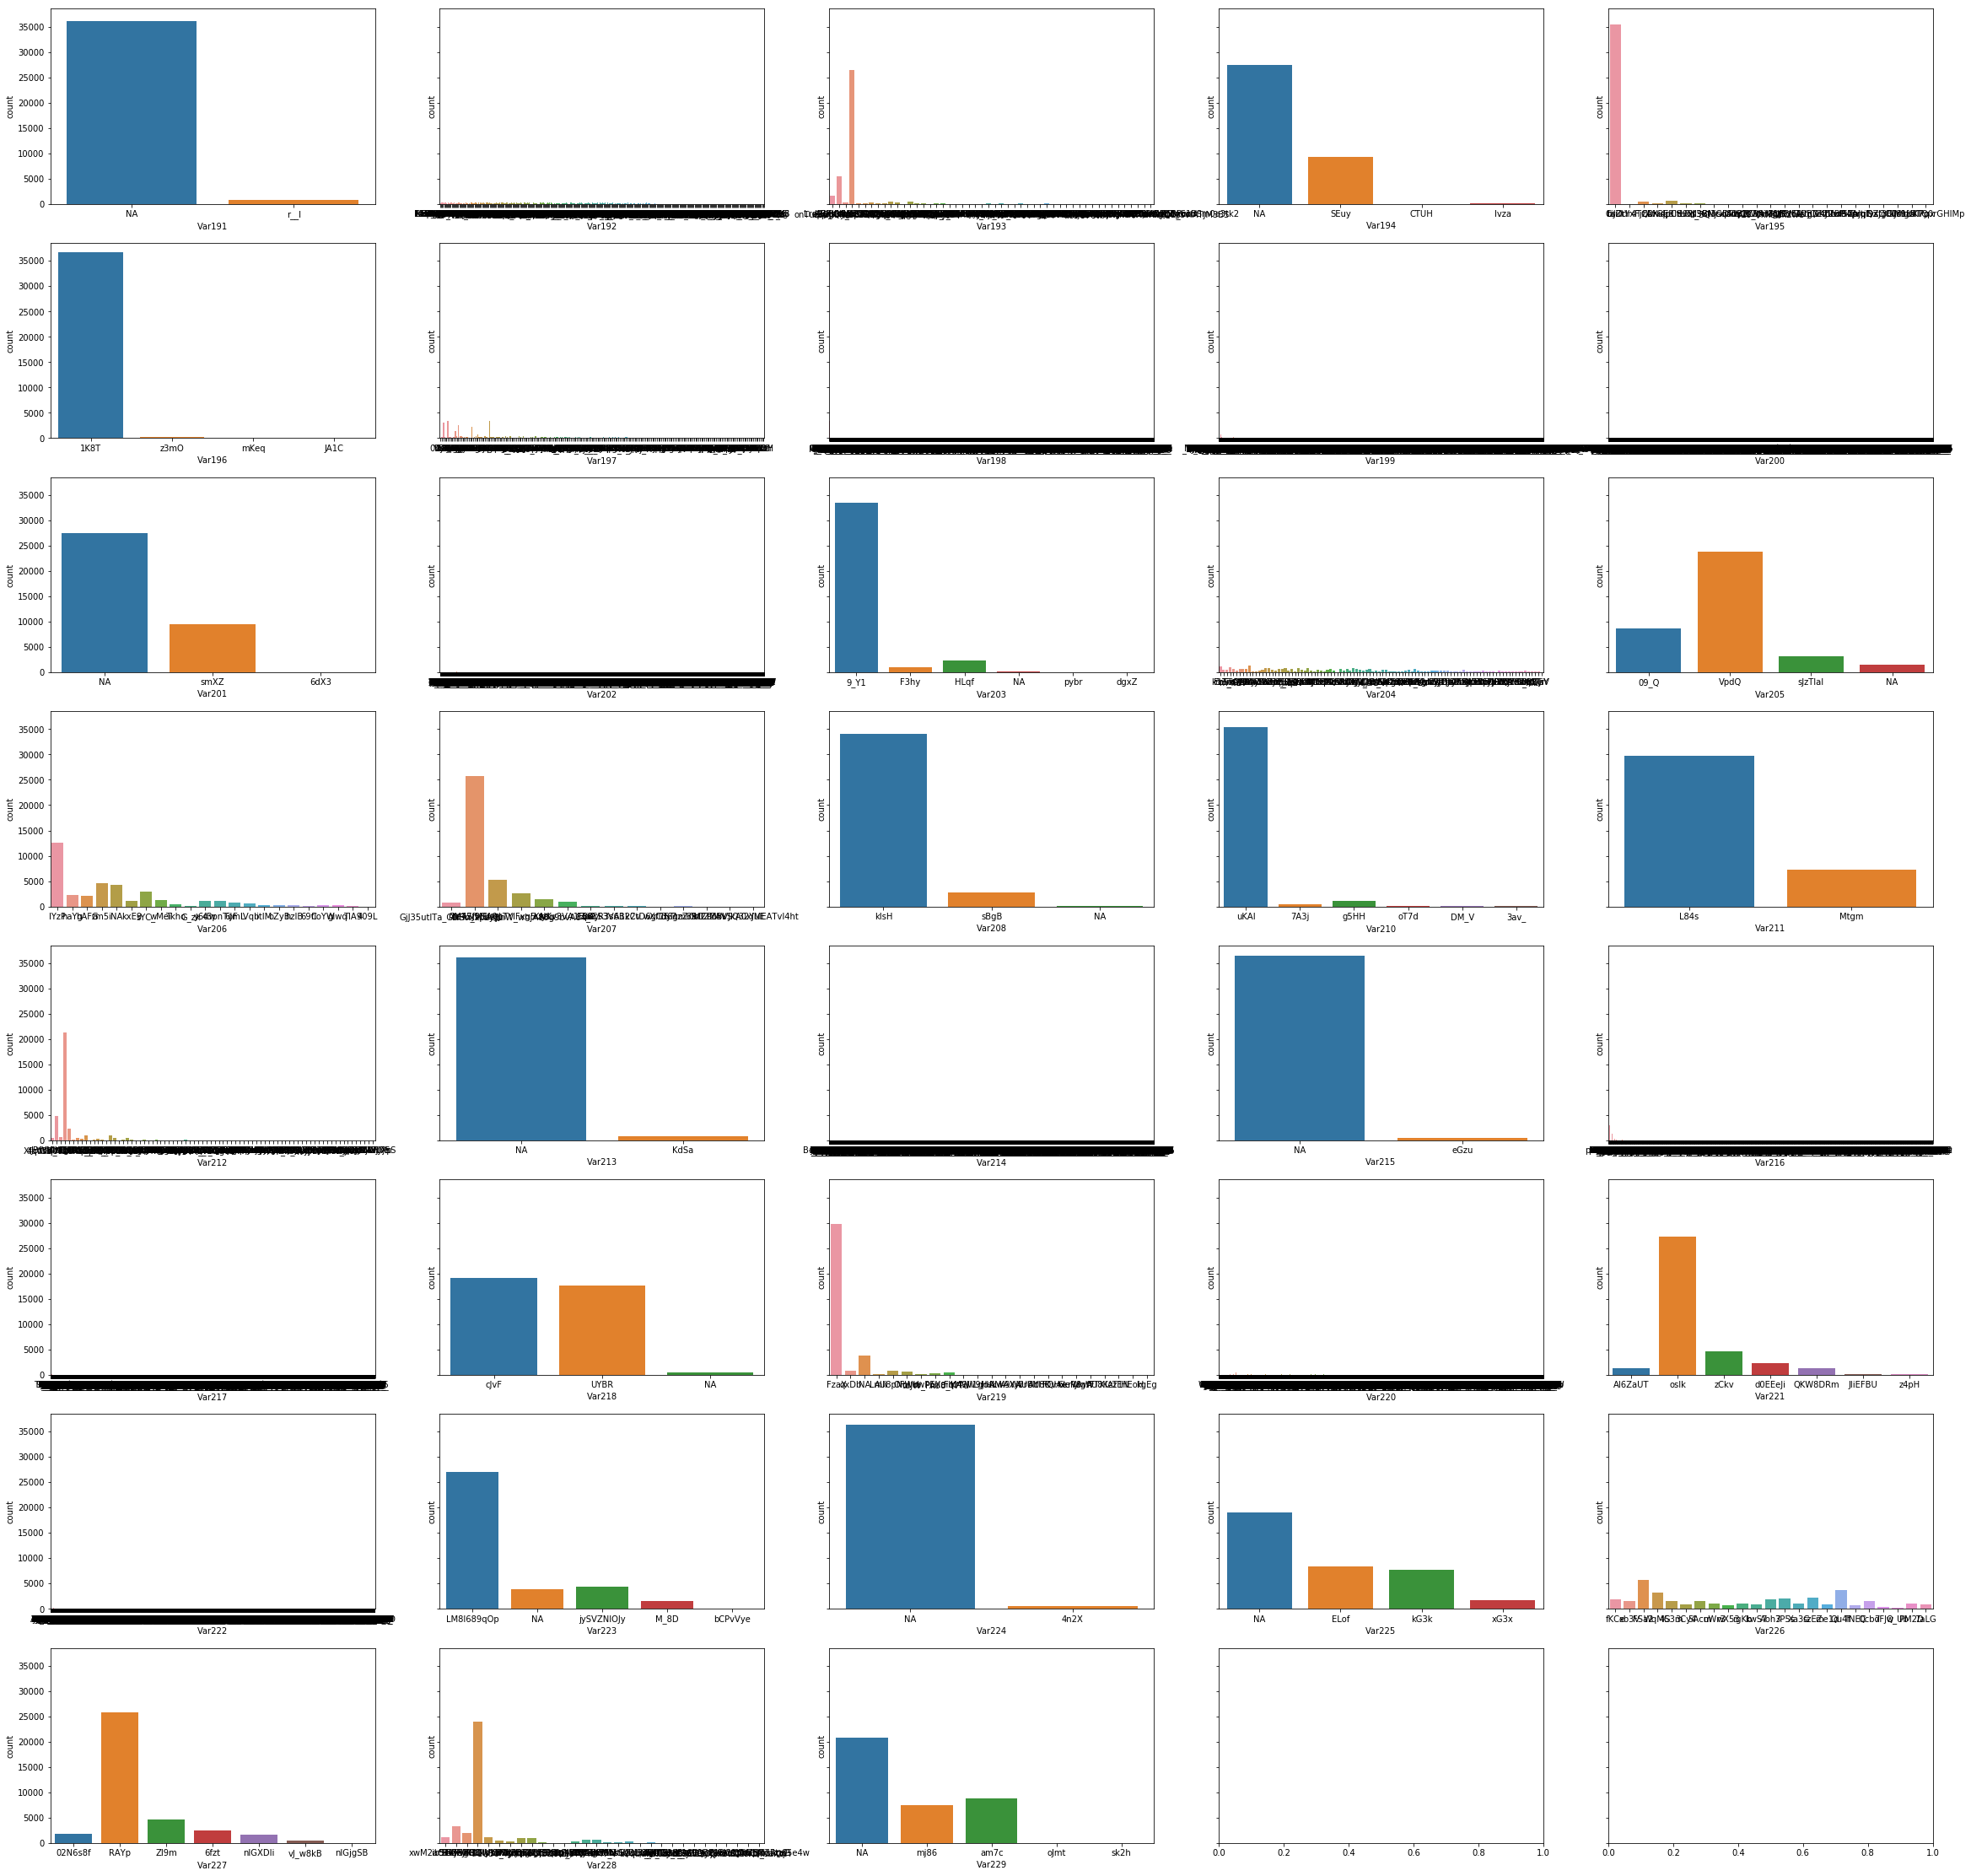

In [79]:
# На каждом графике гистограмма признака для в разрезе класса -1
fig, axes = plt.subplots(8, 5, figsize=(40, 40), sharey=True)
for i in range(X_cat.shape[1]):
    sns.countplot(x=X_cat.columns[i], data=data[data.Class==-1], ax=axes[int(i / 5), i % 5])

In [269]:
# Графики получаются неинформативными из-за того, что некоторые признаки содержат слишком много категорий
# Посчитаем сколько категорий в каждой перeменной:
unique_cat=[]
for j in range(X_cat.shape[1]):
    unique_cat.append(len(X_cat.iloc[:,j].unique()))

In [274]:
# Добавим список категорий в общую таблицу
сorr_cat_tab['Категории']=unique_cat

In [282]:
# Отсорируем по убыванию корреляции, по возрастанию доли пропусков и поставим ограничение не более 30 категорий. 
# Возьмем первые пять признаков и построим для них гистограммы
c = сorr_cat_tab[сorr_cat_tab.Категории <= 30].sort_values(['Корреляция','Доля пропусков'], ascending=[False,True])[:5]

In [292]:
var = list(c.Переменная)
var

['Var218', 'Var206', 'Var228', 'Var205', 'Var229']

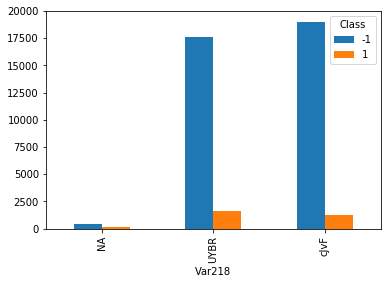

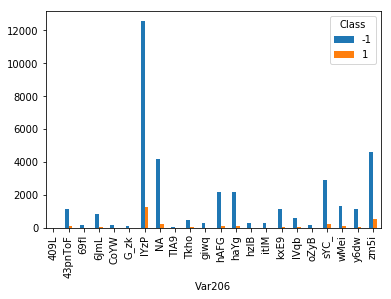

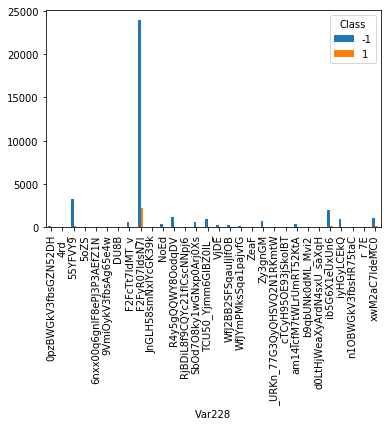

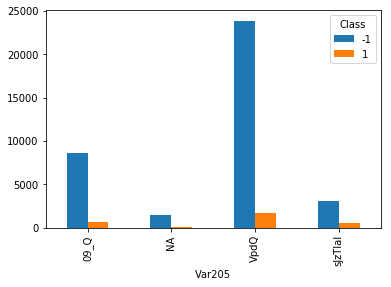

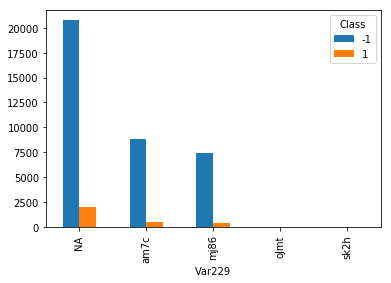

In [293]:
for i in range(len(var)):
    tab_cross = pd.crosstab(X_cat.loc[:, var[i]], data.Class)
    tab_cross.plot(kind='bar')

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?  
*Кажется, что между некоторыми признаками из top20 есть зависимость, т.к.точки выстраиваются по сторонам квадрата или в виде     треугольника (выше/ниже диагонали). Распределение большинства переменных далеко от нормального.*


* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?  
*Скорее всего наибольший вклад в модель внесут переменные, в которых мало пропущенных признаков, мало различных категорий и у которых высокая корреляция с целевой переменной. Также возможно будут значимы те признаки, по графикам которых можно разделить классы. Среди отдельных признаков таких нет (по крайней мере, по графикам топ20 вещ-ых), среди пар признаков это могут быть (73,13), (73,28), (73,74).*


* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?  
*Полностью пустые или с большим кол-ом пропусков, а также с большим кол-ом категорий среди категориальных. Таких много как среди числовых, так и среди категориальных признаков.*


* Как вы думаете, окажется ли отбор признаков полезным для построения модели?  
*Отбор признаков будет полезен, т.к. очень много пропущенных значений и судя по графикам парной корреляции есть зависимые переменные.*